In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re

In [97]:
## change to l2 loss for Switch once I add load balancing loss

In [98]:
topk = pd.read_csv("efficiency-topk.csv")
switch8 = pd.read_csv("efficiency-switch8.csv")

In [99]:
#topk = topk[['Step', 'honest-disco-4 - AutoEncoderTopK-0/loss']] ## k = 128
topk = topk[['Step', 'rural-cloud-3 - AutoEncoderTopK-0/loss']] ## k = 64
#topk = topk[['Step', 'wise-sound-2 - AutoEncoderTopK-0/loss']] ## k = 32
#topk = topk[['Step', 'frosty-resonance-1 - AutoEncoderTopK-0/loss']] ## k = 8

topk.columns = ['step', 'loss']

In [100]:
#switch8 = switch8[['Step', 'fiery-snowball-4 - SwitchAutoEncoder-1/loss']] ## k = 128
switch8 = switch8[['Step', 'fiery-snowball-4 - SwitchAutoEncoder-0/loss']] ## k = 64
#switch8 = switch8[['Step', 'fanciful-sky-3 - SwitchAutoEncoder-1/loss']] ## k = 32
#switch8 = switch8[['Step', 'fanciful-sky-3 - SwitchAutoEncoder-0/loss']] ## k = 8
switch8.columns = ['step', 'loss']

In [101]:
topk = topk[topk['step'] > 4999]
switch8 = switch8[switch8['step'] > 4999]

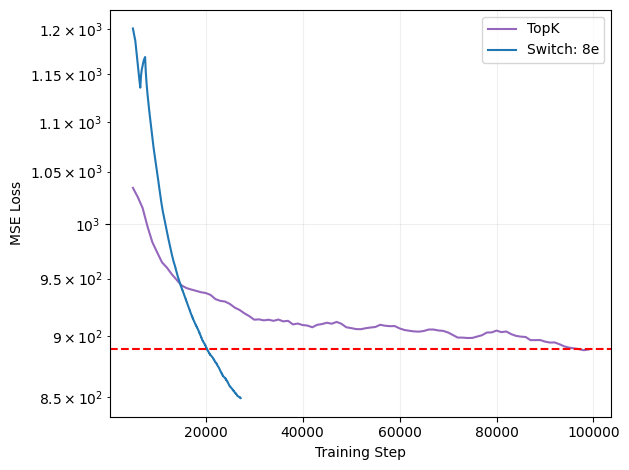

In [102]:
topk_smooth = pd.Series(topk['loss']).rolling(window=5, center=True, min_periods=1).mean()
switch8_smooth = pd.Series(switch8['loss']).rolling(window=1000, center=True, min_periods=1).mean()

plt.plot(topk['step'], topk_smooth, label='TopK',  color='#9467bd')
plt.plot(switch8['step'], switch8_smooth, label='Switch: 8e',  color='#1f77b4')

plt.axhline(y=list(topk_smooth)[-1], color='r', linestyle='--')

#plt.xscale('log')
plt.yscale('log')

plt.xlabel("Training Step")
plt.ylabel("MSE Loss")

plt.legend()

plt.grid(True, which="major", ls="-", alpha=0.2)


plt.tight_layout()
plt.savefig("efficiency.png")
plt.show()